<a href="https://colab.research.google.com/github/albinovik/non_opt_course/blob/main/%D0%98%D1%81%D1%81%D0%BB%D0%B5%D0%B4%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5_%D1%84%D1%83%D0%BD%D0%BA%D1%86%D0%B8%D0%B9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ИССЛЕДОВАНИЕ ФУНКЦИИ ОДНОЙ ПЕРЕМЕННОЙ.** В контекте анализа данных, в результате аппроксимации можно получить сколь угодно сложную функцию. Однако, получив аналитическое выражение, мы можем далее с ним работать и охарактеризовать зависимость, которая возникает в данных. Сейчас речь идет о функции одной переменной.

In [2]:
import numpy as np

#definition of an user function
def func(x):
  return ((x - 5) **3 / (x**2 - 10 * x + 9))

Стандартно исследование функции начинают с определения допустимых значений x, т.е. с области определения. В нашем случае значения x могут быль любыми, кроме тех, которые являются корнями уравнения x^2 - 10x + 9 = 0. Такие уравнение легко решать с библиотекой sympy.

In [3]:
import sympy as sym
x, y, z = sym.symbols('x, y, z')
eq = sym.Eq(x**2 - 10 * x + 9, 0)             # x**2 - 10 * x + 9  = 0
ans = sym.solve(eq, x)
ans

[1, 9]

Итак, в точках x=1 и x=9 находятся вертикальные асимптоты графика функции func(x). Можно заодно найти и наклонные асимтоты, если такие имеются. Асимптота является линейной функции и, в общем случае, задается формулой y = K * x + B. Найдем коэффициенты K и B. 

In [ ]:
from sympy.series.limits import limit
coefK = sym.limit(func(x) / x, x, sym.oo)
coefK

1

In [ ]:
coefB = sym.limit(func(x) - x, x, sym.oo)
coefB

-5

Наклонная асимптота существует и имеет формулу y = x - 5.

Возвращаясь к точкам x=1 и x=9, надо сказать, что это точки разрыва, и поэтому мы можем узнать, как ведет себя функция вблизи этих точек.

In [ ]:
# x = 1 (left)
sym.limit(func(x), x, 1, dir = '-')

-oo

In [ ]:
# x = 1 (right)
sym.limit(func(x), x, 1, dir = '+')

oo

In [ ]:
# x = 9 (left)
sym.limit(func(x), x, 9, dir = '-')

-oo

In [ ]:
# x = 9 (right)
sym.limit(func(x), x, 9, dir = '+')

oo

Если бы мы не пользовались средствами библиотек языка программирования python, то мы бы вручную строили график функции. Для этого необходимо знать точки пересечения с осями ортогональной системы координат. 

In [ ]:
import sympy as sym
x = sym.Symbol('x')
eq2 = sym.Eq(func(x), 0)             # (x - 5) **3 / (x**2 - 10 * x + 9)  = 0
ans = sym.solve(eq2, x)
ans

[5]

In [ ]:
func(0)

-13.88888888888889

Точки пересечения графика с осью x:

A(5, 0)

Точки пересечения графика с осью y:

B(0, -13.9)

Далее определяем промежутки монотонности и экстремумы функции. Для этого вычисляем первые производные.

In [ ]:
d_f = func(x).diff(x)
d_f

(10 - 2*x)*(x - 5)**3/(x**2 - 10*x + 9)**2 + 3*(x - 5)**2/(x**2 - 10*x + 9)

In [ ]:
d_f2 = d_f.simplify()
d_f2

(x - 5)**2*(3*x**2 - 30*x - 2*(x - 5)**2 + 27)/(x**2 - 10*x + 9)**2

In [ ]:
import sympy as sym
x = sym.Symbol('x')
eq3 = sym.Eq(d_f2, 0)             
ans = sym.solve(eq3, x)
ans

[5, 5 - 4*sqrt(3), 5 + 4*sqrt(3)]

Слева и справа от точки x=5 производная функции имеет один и тот же знак, что означает, что это точка не является экстремумом. 

In [ ]:
d_f2.subs(x,4.8)

-0.00753135972763991

In [ ]:
d_f2.subs(x,5.2)

-0.00753135972763992

При подстановке значения x=5 в функцих func(x) мы получаем значение y, соответствующее пересечению с осью x. 

Проверим другие точки на роль кандидатов в экстремумы. Слева и справа от точки x=5 - 4*sqrt(3) производная функции меняет знак с '+' на '-'. Значит, мы нашли максимум функции func(x).

In [ ]:
d_f2.subs(x, -2)

49/1089

In [ ]:
d_f2.subs(x, 0)

-575/81

Слева и справа от точки x = 5 + 4*sqrt(3) производная функции меняет знак с '-' на '+'. Значит, мы нашли минимум функции func(x).

In [ ]:
d_f2.subs(x, 10)

-575/81

In [ ]:
d_f2.subs(x, 12)

49/1089

Далее определим промежутки выпуклости и вогнутости функции func(x) с помощью второй производной.

In [ ]:
d_f3 = d_f2.diff(x)
d_f3

(20 - 4*x)*(x - 5)**2*(3*x**2 - 30*x - 2*(x - 5)**2 + 27)/(x**2 - 10*x + 9)**3 + (x - 5)**2*(2*x - 10)/(x**2 - 10*x + 9)**2 + (2*x - 10)*(3*x**2 - 30*x - 2*(x - 5)**2 + 27)/(x**2 - 10*x + 9)**2

In [ ]:
d_f4 = d_f3.simplify()
d_f4

32*(x**3 - 15*x**2 + 123*x - 365)/(x**6 - 30*x**5 + 327*x**4 - 1540*x**3 + 2943*x**2 - 2430*x + 729)

In [ ]:
import sympy as sym
x = sym.Symbol('x')
eq4 = sym.Eq((32 * (x-5) * (x**2 - 10*x + 73))/((x-1)**3 * (x-9)), 0)             
ans = sym.solve(eq4, x)
ans

[5, 5 - 4*sqrt(3)*I, 5 + 4*sqrt(3)*I]

Из решения остается только точка x=5. Также в рассмотрение попадают точки, через которые проходят асимптоты. Знаки второй производной в промежутках между этими точками показаны ниже.

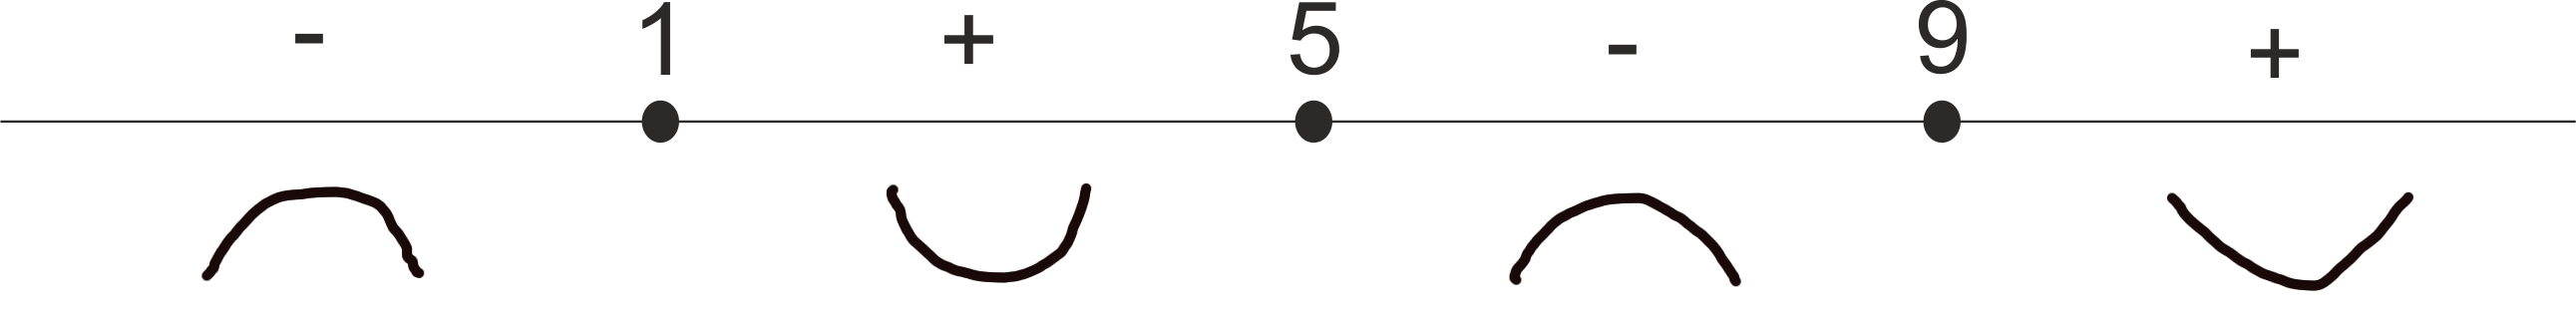

В заключении построим график функции.

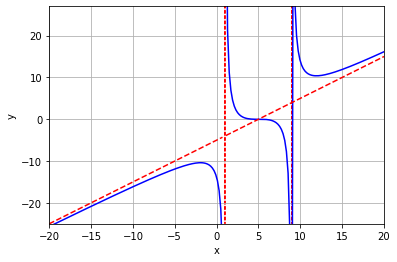

In [8]:
import matplotlib.pyplot as plt
x = np.linspace(-20, 20, 200)
x[(x>0.9) & (x<1.1)] = np.nan #correction of the break point
#x[(x>8.9) & (x<9.1)] = np.nan #correction of the break point

y = np.vectorize(func)
plt.plot(x,y(x),'b-')

#images of the asymptotes
plt.arrow(1,-25,0, 60,
          color = 'r',
          width = 0.008,
          linestyle='dashed')

plt.arrow(9,-25,0, 60,
          color = 'r',
          width = 0.008,
          linestyle='dashed')

#definition of an user fucntion
def func2(x):
  return (x - 5)
y2 = np.vectorize(func2)
plt.plot(x,y2(x),'r--')

plt.xlabel('x')
plt.ylabel('y')
plt.xlim([-20, 20])
plt.ylim([-25, 27])
plt.grid()
plt.show()